# PROBLEM STATEMENT#

**Susan is a Manager of a store that sells multiple juice brands. She wants to develop a performance dashboard. Attached is that sample dataset she’s taken a from the past. The sample data contains weekly volume of sales for orange juice, and information about how much was spent on advertisements, television, temperature, petrol prices etc**

She has an annual conference coming up in less than a week to prepare for, but wanted to get this started without delay. She jotted down a few bullets to convey what she has in mind for the dashboard**

-	The dashboard should have 3 tabs.

-	I want the first tab to show how the Orange Juice Sales (Both in Gallons as well as Revenue) across time. There has to be two graphs in this tab.
o	One should show the sales trend for the entire time period, and I should be able to collapse or expand to see yearly, quarterly, monthly or weekly. 
o	The other chart should show the trends of 52 weeks, and have one line per year. On this graph, I should have a filter to select just one year, or multiple years. 

-	In the second tab, I would like to see how Orange Juice Sales (Gallons) change in relation to factors which we can control (like prices, advertisement spend, promotions, TV etc.). Each graph in this tab can either be X-Y type charts, or show how both variables vary across time. I should have filters to select one or multiple years

-	In the final tab, I would like to see how the Orange Juice Sales (Gallons) change in relation to the factors outside control (temperature, petrol prices, holidays etc.). Each graph in this tab can either be X-Y type charts, or show how both variables vary across time. I should have filters to select one or multiple years

# CONTENTS #

- **Data Loading and Exploration (Missing values, datatype identification)**
- **Feature Transformations (Aggregations based on different time periods)**
- **Visualization of Relationships between Features (Univarate & Bivariate analysis, Correlation coefficients)**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display_html

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

**DATA LOADING AND EXPLORATION**

In [2]:
oj = pd.read_csv(r"C:\Users\Sasidharan\Desktop\Data Science Projects\Tiger Analytics\Orange_Juice.csv")

In [3]:
oj.shape

(196, 14)

**We have 196 data points with each datapoint having 14 attributes**

In [4]:
oj.isnull().sum()

Year                                  0
Week_Number                           0
Week_Begin_Date                       0
Qty of Orange Juice Sold (Gallons)    0
Advertisement Spend by Store $        0
Price per Gallon ($/Gallon)           0
% Discount                            0
Temperature (Farenheit)               0
Petrol Price $ / Gallon               0
TV Spend by Brand1 $ ('000)           0
TV Spend by Brand2 $ ('000)           0
Christmas Week                        0
Easter Week                           0
New Year Week                         0
dtype: int64

**We do not have any missing values in our dataset**

In [5]:
oj.head()

,Year,Week_Number,Week_Begin_Date,Qty of Orange Juice Sold (Gallons),Advertisement Spend by Store $,Price per Gallon ($/Gallon),% Discount,Temperature (Farenheit),Petrol Price $ / Gallon,TV Spend by Brand1 $ ('000),TV Spend by Brand2 $ ('000),Christmas Week,Easter Week,New Year Week
0,2006,1,01-01-2006,3753938,73.0,4.95,0.29,34.67,233.2,0.11,0.19,0,0,1
1,2006,2,08-01-2006,3530670,45.0,5.02,0.37,33.66,226.3,0.15,0.15,0,0,0
2,2006,3,15-01-2006,3575088,40.0,5.07,0.38,30.73,228.2,0.19,0.34,0,0,0
3,2006,4,22-01-2006,3453849,52.0,5.09,0.41,34.68,231.4,0.15,0.30,0,0,0
4,2006,5,29-01-2006,3432755,45.0,5.12,0.39,31.22,228.0,0.20,0.43,0,0,0


In [6]:
oj.tail()

,Year,Week_Number,Week_Begin_Date,Qty of Orange Juice Sold (Gallons),Advertisement Spend by Store $,Price per Gallon ($/Gallon),% Discount,Temperature (Farenheit),Petrol Price $ / Gallon,TV Spend by Brand1 $ ('000),TV Spend by Brand2 $ ('000),Christmas Week,Easter Week,New Year Week
191,2009,36,30-08-2009,2615927,2.3,5.93,0.32,67.00,246.2,0.17,0.0,0,0,0
192,2009,37,06-09-2009,2698007,38.0,5.90,0.34,64.94,246.3,0.13,0.0,0,0,0
193,2009,38,13-09-2009,2589453,46.4,5.89,0.31,62.87,244.5,0.18,0.0,0,0,0
194,2009,39,20-09-2009,2568969,3.8,5.89,0.36,51.17,237.5,0.22,0.0,0,0,0
195,2009,40,27-09-2009,2676152,0.0,5.87,0.34,44.78,235.8,0.24,0.0,0,0,0


**The data we have is sales data of Orange Juice from January,2006 - September,2009 on a weekly basis.**

In [7]:
oj.describe()

,Year,Week_Number,Qty of Orange Juice Sold (Gallons),Advertisement Spend by Store $,Price per Gallon ($/Gallon),% Discount,Temperature (Farenheit),Petrol Price $ / Gallon,TV Spend by Brand1 $ ('000),TV Spend by Brand2 $ ('000),Christmas Week,Easter Week,New Year Week
count,196.000000,196.000000,1.960000e+02,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,2007.408163,25.275510,2.791303e+06,31.370408,5.960255,0.321276,48.722041,271.108163,0.167959,0.155357,0.015306,0.020408,0.020408
std,1.089217,14.608589,3.038569e+05,25.924044,0.412647,0.044050,18.882743,58.531700,0.055126,0.180902,0.123082,0.141754,0.141754
min,2006.000000,1.000000,2.300853e+06,0.000000,4.950000,0.210000,5.340000,156.700000,0.050000,0.000000,0.000000,0.000000,0.000000
25%,2006.000000,13.000000,2.542504e+06,0.675000,5.590000,0.290000,33.467500,226.250000,0.130000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,25.000000,2.782555e+06,42.000000,6.170000,0.320000,51.965000,275.500000,0.170000,0.075000,0.000000,0.000000,0.000000
75%,2008.000000,37.000000,2.981456e+06,52.075000,6.272500,0.352500,66.630000,301.550000,0.200000,0.280000,0.000000,0.000000,0.000000
max,2009.000000,52.000000,3.753938e+06,84.000000,6.350000,0.420000,77.930000,406.600000,0.350000,0.700000,1.000000,1.000000,1.000000


In [8]:
oj.dtypes

Year                                    int64
Week_Number                             int64
Week_Begin_Date                        object
Qty of Orange Juice Sold (Gallons)      int64
Advertisement Spend by Store $        float64
Price per Gallon ($/Gallon)           float64
% Discount                            float64
Temperature (Farenheit)               float64
Petrol Price $ / Gallon               float64
TV Spend by Brand1 $ ('000)           float64
TV Spend by Brand2 $ ('000)           float64
Christmas Week                          int64
Easter Week                             int64
New Year Week                           int64
dtype: object

**We can treat Week_Begin_Date as a datetime object to extract additional information about the time period of corresponding sale (Month, Quarter etc). We can then use these time periods(week, month, quarter, year) to create aggregates (sum/mean) of key variables(Sales,Revenue) over this time frame**

**FEATURE TRANSFORMATIONS**

In [9]:
import calendar

# Converting Week Begin Date to a datetime format;
oj["Week_Begin_Date"] = pd.to_datetime(oj["Week_Begin_Date"], dayfirst=True)

# Month data of corresponding sale,ex: Jan-06,Mar-09 etc.
oj["Month_Number"] = oj["Week_Begin_Date"].dt.month
oj["Month"] = oj["Month_Number"].apply(lambda x: calendar.month_abbr[x])
oj["Yr"] = oj["Year"].astype('str').transform(lambda x: x[2:4])
oj["Month"] = oj["Month"] + '-' + oj["Yr"]

# Quarter the sale took place in;
oj["Quarter"] = oj["Week_Begin_Date"].dt.to_period('Q')

# Creating a week counter from first sale to last sale, which is 196 weeks;
oj["Week_Number_Overall"] = 0
for i in range(oj.shape[0]):
    oj["Week_Number_Overall"][i] = i+1
    
# Weekly Revenue after discount in $ (Millions); Considering discount values as following (0.29 implies 29 %, otherwise the percentages are negligible)
oj["Weekly Revenue"] = oj["Qty of Orange Juice Sold (Gallons)"]* (oj["Price per Gallon ($/Gallon)"])*(1 - (oj["% Discount"])) / 1000000

In [10]:
oj.head()

,Year,Week_Number,Week_Begin_Date,Qty of Orange Juice Sold (Gallons),Advertisement Spend by Store $,Price per Gallon ($/Gallon),% Discount,Temperature (Farenheit),Petrol Price $ / Gallon,TV Spend by Brand1 $ ('000),TV Spend by Brand2 $ ('000),Christmas Week,Easter Week,New Year Week,Month_Number,Month,Yr,Quarter,Week_Number_Overall,Weekly Revenue
0,2006,1,2006-01-01,3753938,73.0,4.95,0.29,34.67,233.2,0.11,0.19,0,0,1,1,Jan-06,06,2006Q1,1,13.193215
1,2006,2,2006-01-08,3530670,45.0,5.02,0.37,33.66,226.3,0.15,0.15,0,0,0,1,Jan-06,06,2006Q1,2,11.166097
2,2006,3,2006-01-15,3575088,40.0,5.07,0.38,30.73,228.2,0.19,0.34,0,0,0,1,Jan-06,06,2006Q1,3,11.237932
3,2006,4,2006-01-22,3453849,52.0,5.09,0.41,34.68,231.4,0.15,0.30,0,0,0,1,Jan-06,06,2006Q1,4,10.372254
4,2006,5,2006-01-29,3432755,45.0,5.12,0.39,31.22,228.0,0.20,0.43,0,0,0,1,Jan-06,06,2006Q1,5,10.721180


In [11]:
# Aggregates of Key Sales Attributes over different TimeFrames - Week (already available to us), Monthly, Quarterly, Yearly;


# 1. Overall Sales, Revenue accumulated on Monthly Basis;
oj["Total Monthly Revenue"] = oj.groupby("Month")["Weekly Revenue"].transform("sum")
oj["Total Monthly Sales"] = oj.groupby("Month")["Qty of Orange Juice Sold (Gallons)"].transform("sum")

# 2. Overall Sales, Revenue accumulated on Quarterly Basis;
oj["Total Quarterly Revenue"] = oj.groupby("Quarter")["Weekly Revenue"].transform("sum")
oj["Total Quarterly Sales"] = oj.groupby("Quarter")["Qty of Orange Juice Sold (Gallons)"].transform("sum")

# 3. Overall Sales, Revenue accumulated on Yearly Basis;
oj["Total Yearly Revenue"] = oj.groupby("Year")["Weekly Revenue"].transform("sum")
oj["Total Yearly Sales"] = oj.groupby("Year")["Qty of Orange Juice Sold (Gallons)"].transform("sum")


# 4. Mean weekly Sales, Revenue on Monthy Basis;
oj["Mean Weekly Revenue by Month"] = oj.groupby("Month")["Weekly Revenue"].transform("mean")
oj["Mean Weekly Sales by Month"] = oj.groupby("Month")["Qty of Orange Juice Sold (Gallons)"].transform("mean")

# 5. Mean weekly Sales, Revenue on Quarterly Basis;
oj["Mean Weekly Revenue by Quarter"] = oj.groupby("Quarter")["Weekly Revenue"].transform("mean")
oj["Mean Weekly Sales by Quarter"] = oj.groupby("Quarter")["Qty of Orange Juice Sold (Gallons)"].transform("mean")

# 6. Mean weekly Sales, Revenue on Yearly Basis;
oj["Mean Weekly Revenue by Year"] = oj.groupby("Year")["Weekly Revenue"].transform("mean")
oj["Mean Weekly Sales by Year"] = oj.groupby("Year")["Qty of Orange Juice Sold (Gallons)"].transform("mean")

# 7. Cumulative Sales and Revenue of the data (Jan 2006 - Sep 2009)
oj["Cumulative Sales (Gallons)"] = oj["Qty of Orange Juice Sold (Gallons)"].cumsum()
oj["Cumulative Revenue $('000)"] = oj["Weekly Revenue"].cumsum()

# 8. Mean Price by year
oj["Mean Yearly Price"] = oj.groupby("Year")["Price per Gallon ($/Gallon)"].transform("mean")

# 9. Total TV Spend,Advertisment,Discount by year
oj["Total TV Spend"] = oj["TV Spend by Brand1 $ ('000)"] + oj["TV Spend by Brand2 $ ('000)"]
oj["Total TV Spend by Year"] = oj.groupby("Year")["Total TV Spend"].transform("sum")

oj["Total AD Spend by Year"] = oj.groupby("Year")["Advertisement Spend by Store $"].transform("sum")
oj["Avg % Discount by Year"] = oj.groupby("Year")["% Discount"].transform("mean")


# We will utilize these features later on for univartiate and bivariate studies;

**VISUALIZATION OF RELATIONSHIPS BETWEEN FEATURES**

1. Univaratiate Analysis on Sales & Revenue over time;
2. Bivariate Analyis (Sales vs Prices, Advertisement and TV Spend) - Controllable factors;
3. Bivariate Analysis (Sales vs Temperature, Petrol Prices, Holiday Week) - Uncontrollable factors;

**UNIVARIATE ANALYSIS ON SALES, REVENUE,PRICE,TEMPERATURE**

In [12]:
def plotter(df,x,y1,y2,y3,y4):
    fig, ax = plt.subplots(2,2,figsize=(12,7))
    
    ax[0,0].plot(df[x],df[y1], 'r-')
    ax[0,0].set(xlabel='Week Number Overall', ylabel='Weekly Sales (Gallons)')
    
    ax[0,1].plot(oj[x],oj[y2],'g-')
    ax[0,1].set(xlabel='Week Number Overall', ylabel='Weekly Revenue $(M)')
    
    ax[1,0].plot(oj[x],oj[y3],'b-')
    ax[1,0].set(xlabel='Week Number Overall', ylabel='Price $(/Gallon)')
    
    ax[1,1].plot(oj[x],oj[y4],'y-')
    ax[1,1].set(xlabel='Week Number Overall', ylabel='Temperature')
    
    fig.tight_layout()

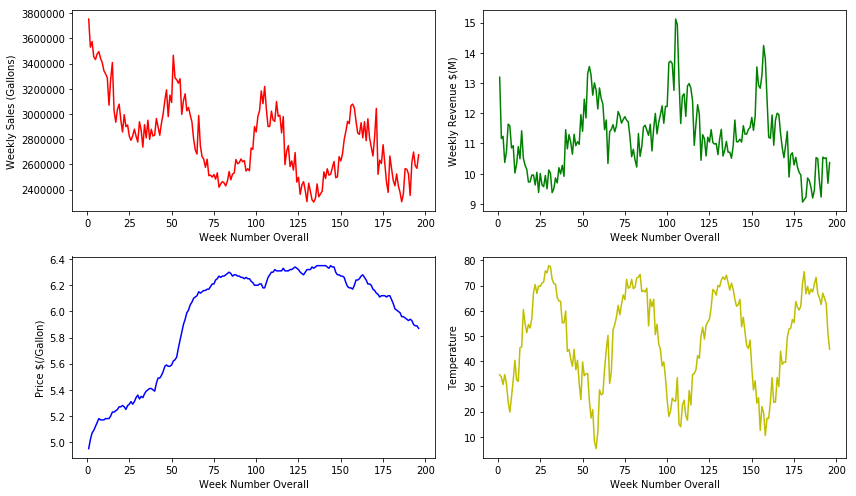

In [13]:
plotter(oj,'Week_Number_Overall','Qty of Orange Juice Sold (Gallons)','Weekly Revenue','Price per Gallon ($/Gallon)','Temperature (Farenheit)')

** We can see that weekly sales volume has a strong character of seasonality. Since Revenue is directly dependent on the sales volume, it also shows the same trend of seasonality. We can see that near the start of the year business activity is usually at it's peak following which it hits it's trough in the middle of the year, and picks up towards the end of the year. At the same time we can notice that when a trough occurs in sales, a peak occurs in temperature. This suggests an negative correlation exists between temperature and sales, which we will validate in upcoming section.We can also notice that the peaks are decreasing indicating that sales volumes are going down year by year, although revenue peaks are fairly consistent ( This compensation is due to the increase in price of Orange Juice has gone up through the years). The seasonality (peak and trough) behaviour of Sales may be attributed to other factors(Holidays, Costs etc) which we will investigate using Bivariate Analysis.**

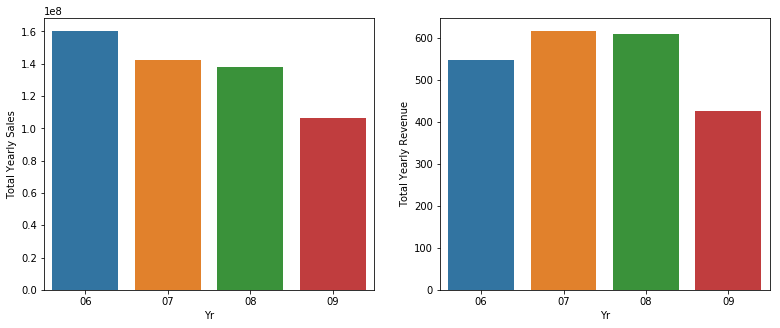

In [14]:
a = pd.DataFrame(oj.groupby(["Yr"])["Total Yearly Sales"].mean()).reset_index(drop=False)
b = pd.DataFrame(oj.groupby(["Yr"])["Total Yearly Revenue"].mean()).reset_index(drop=False)

fig, ax = plt.subplots(1,2,figsize=(13,5))
sns.barplot(x=a["Yr"],y=a["Total Yearly Sales"], ax=ax[0])
sns.barplot(x=b["Yr"],y=b["Total Yearly Revenue"],ax=ax[1])

plt.show()

**As mentioned earlier sales volumes are decreasing across the year, while revenue numbers have held steady due to price increase. Sales and Revenue values of 2009, can still increase during the upcoming months (we have data only till Sep - 2009);**

**BIVARIATE ANALYSIS ON CONTROLLABLE FACTORS**
1. Price per gallon
2. Discount offered
3. Ad Spending by Store
4. TV Spending 

In [15]:
oj.corr()["Qty of Orange Juice Sold (Gallons)"]

Year                                 -0.504909
Week_Number                          -0.331800
Qty of Orange Juice Sold (Gallons)    1.000000
Advertisement Spend by Store $        0.144354
Price per Gallon ($/Gallon)          -0.639926
% Discount                            0.403896
Temperature (Farenheit)              -0.657889
Petrol Price $ / Gallon              -0.477231
TV Spend by Brand1 $ ('000)           0.268746
TV Spend by Brand2 $ ('000)           0.132876
Christmas Week                        0.164461
Easter Week                           0.149461
New Year Week                         0.256984
Month_Number                         -0.246378
Week_Number_Overall                  -0.589601
Weekly Revenue                        0.346327
Total Monthly Revenue                 0.133833
Total Monthly Sales                   0.574799
Total Quarterly Revenue               0.141797
Total Quarterly Sales                 0.813960
Total Yearly Revenue                  0.000119
Total Yearly 

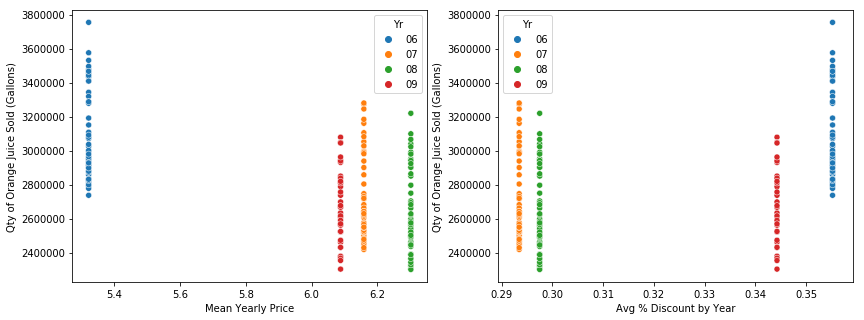

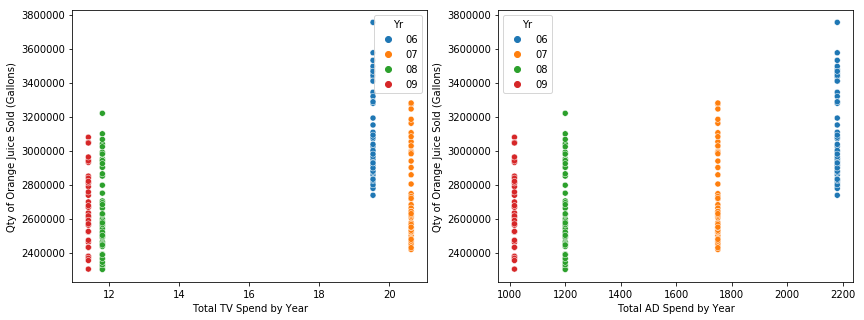

In [16]:
def plots(df,x1,x2,y,y1):
    
    fig, ax = plt.subplots(1,2,figsize=(14,5))
    sns.scatterplot(data=df,x=x1,y=y,hue=y1,ax=ax[0])
    sns.scatterplot(data=df,x=x2,y=y,hue=y1,ax=ax[1])
    plt.show()

plots(oj,"Mean Yearly Price","Avg % Discount by Year","Qty of Orange Juice Sold (Gallons)","Yr")
plots(oj,"Total TV Spend by Year","Total AD Spend by Year","Qty of Orange Juice Sold (Gallons)","Yr")

**By Looking at the plots and correlation coefficients, we can establish that selling price has a negative correlation with sales (increased selling price results in lesser sales) and factors like Advertisement Spending, TV Spending and Discount have positive correlation with sales. (Increasing these factors results in increased sales).**

**BIVARIATE ANALYSIS ON UNCONTROLLABLE FACTORS**

1. Temperature
2. Petrol Prices
3. Holidays (New Year, Christmas, Easter)

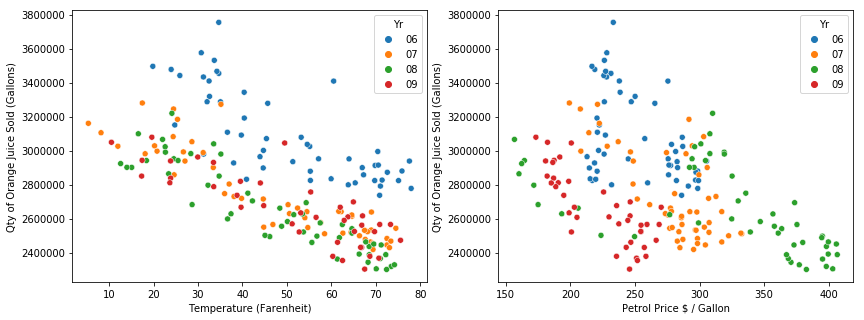

In [17]:
plots(oj,"Temperature (Farenheit)","Petrol Price $ / Gallon","Qty of Orange Juice Sold (Gallons)","Yr")

In [18]:
# Identifying all the holiday weeks  and storing it in a new column;

oj["Holiday"] = oj["Easter Week"] + oj["Christmas Week"] + oj["New Year Week"]
oj["Holiday_week"] = oj["Holiday"].transform(lambda x: 1 if x >= 1 else 0)

In [19]:
# Mean weekly sales on a holiday vs non holiday week;
oj.groupby(["Holiday_week"])["Qty of Orange Juice Sold (Gallons)"].mean()

Holiday_week
0    2.766366e+06
1    3.210686e+06
Name: Qty of Orange Juice Sold (Gallons), dtype: float64

In [20]:
# Mean weekly prices on a holiday vs non holiday week;
oj.groupby(["Holiday_week"])["Price per Gallon ($/Gallon)"].mean()

Holiday_week
0    5.964324
1    5.891818
Name: Price per Gallon ($/Gallon), dtype: float64

In [21]:
# Mean weekly discount rates on a holiday vs non holiday week;
oj.groupby(["Holiday_week"])["% Discount"].mean()

Holiday_week
0    0.320811
1    0.329091
Name: % Discount, dtype: float64

**Temperature has a negative correlation with sales. It is not clearly evident as why this may occur. But we can formulate hypothesis to test further based on this (does temperature affect oranje cultivation thus impacting global supply chain etc). Petrol prices generally have a negative correlation with sales although it is not quite clearly eveident in the plots (a hypothesis we can form on this is increased petrol prices create extra transporation costs which ultimately impacts selling price and sales).Finally, more sales tend to occur on holiday weeks compared to non-holiday weeks which we can possible attribute to decrease in prices due to discounts.**

***********************